In [5]:
import pandas as pd
import numpy as np
import os
import json
from scipy import stats
import seaborn as sns
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [6]:
# Läs in JSON-filen och spara som en CSV-fil
weather_data = pd.read_json('weatherstation.json')
weather_data.to_csv('weatherstation.csv', index=False)

# Läs in väderstationsdatan från CSV och rensa saknade värden
weather_df = pd.read_csv('weatherstation.csv')
cleaned_weather_df = weather_df.dropna()

# Läs in vinddatafilerna
wind_sep = pd.read_csv('wind_data_sep.csv')
wind_oct = pd.read_csv('wind_data_oct.csv')
wind_nov = pd.read_csv('wind_data_nov.csv')

# Visa storleken på den rensade väderstationsdatan
cleaned_weather_df.shape


(13053, 7)

In [7]:
# Kombinera vinddata från alla tre månader
combined_wind_data = pd.concat([wind_sep, wind_oct, wind_nov], ignore_index=True)

# Ta bort rader med saknade värden från den sammanslagna vinddatan
cleaned_wind_data = combined_wind_data.dropna()

# Spara den rensade vinddatan som en CSV-fil
cleaned_wind_data.to_csv("Cleaned_Wind_Data.csv", index=False)

# Läs in den nya, rensade vinddatafilen
final_wind_data = pd.read_csv("Cleaned_Wind_Data.csv")

# Visa storleken på den slutliga vinddatan
final_wind_data.shape


(8544, 3)

In [8]:
# Slå ihop rensad vinddata med rensad väderstationsdata
merged_dfs = pd.merge(cleaned_wind_data, cleaned_weather_df, on="timestamp", how="inner")

# Spara den sammanslagna datan till en CSV-fil
merged_dfs.to_csv("merged_data.csv", index=False)

# Läs in den sammanslagna datan från filen
data = pd.read_csv('merged_data.csv')

# Konvertera till DataFrame och hantera tidsstämplar
dfs = pd.DataFrame(data)
dfs['timestamp'] = pd.to_datetime(dfs['timestamp'], errors='coerce')

# Visa storleken på den slutliga datan
data.shape


(4254, 9)

In [9]:
# Filtrera data för september månad
dataset_sep = dfs[dfs['timestamp'].between('2018-09-01', '2018-10-01')]

# Kontrollera storleken på september-datasetet
dataset_sep.shape

# Visa de sista raderna i september-datasetet
dataset_sep.tail()

# Beskrivande statistik för september-datasetet
dataset_sep.describe()


,wind_speed,wind_direction,precipitation,humidity,radiation,sunshine,pressure,temperature
count,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000
mean,3.810247,133.398300,0.005846,64.170494,192.011134,352.286987,1019.453027,19.898887
std,2.049599,68.876349,0.084983,18.487345,259.186240,291.537178,6.025872,4.872723
min,0.085533,20.225667,0.000000,17.800000,0.000000,0.000000,1007.500000,7.300000
25%,2.208933,82.559333,0.000000,49.300000,0.000000,0.000000,1015.600000,16.800000
50%,3.483667,113.106667,0.000000,64.100000,4.900000,598.700000,1018.400000,19.800000
75%,5.093133,159.413333,0.000000,80.300000,391.600000,600.000000,1022.000000,23.300000
max,12.811333,329.040000,2.700000,96.200000,928.000000,600.000000,1039.700000,30.400000


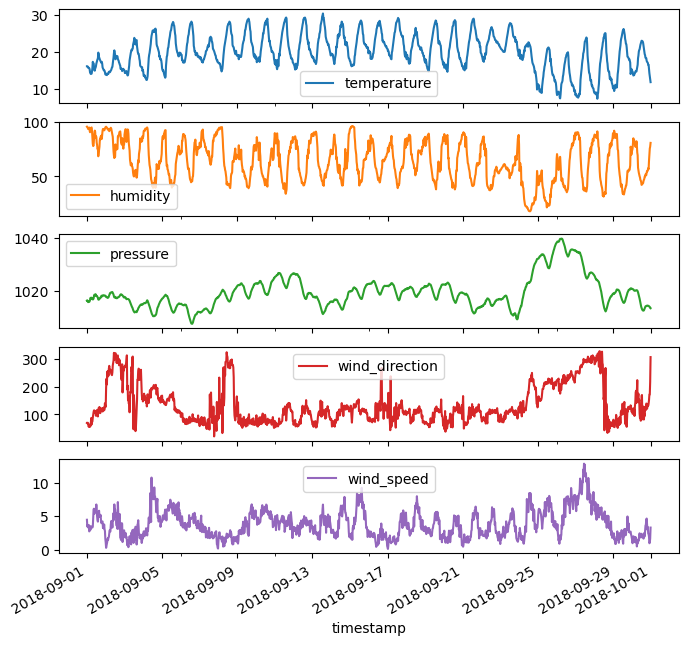

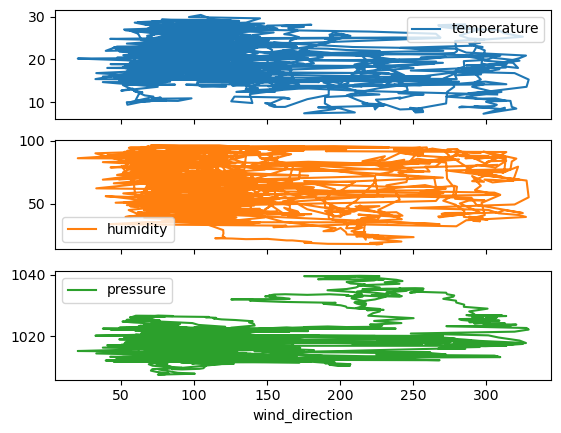

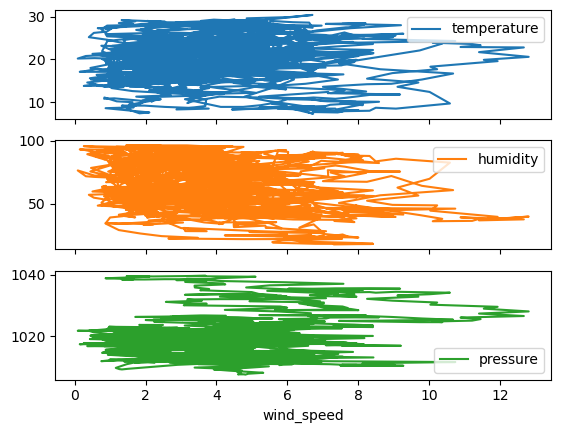

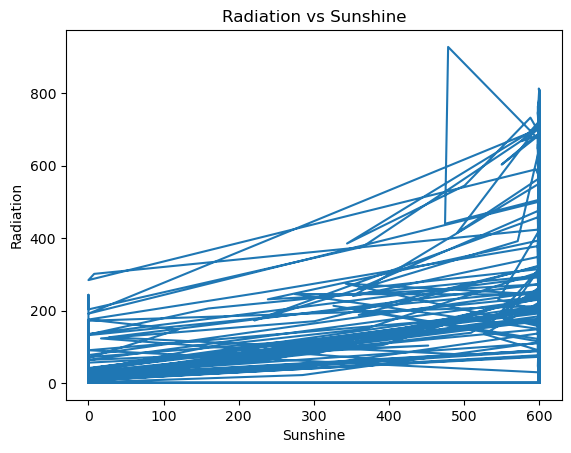

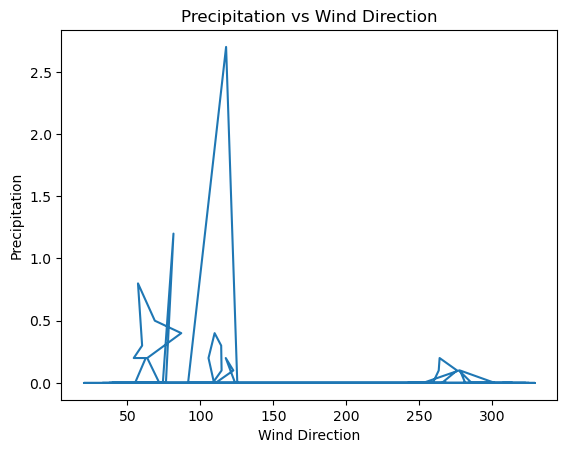

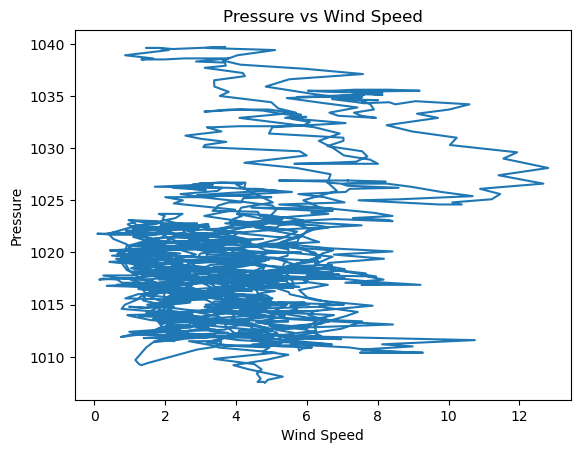

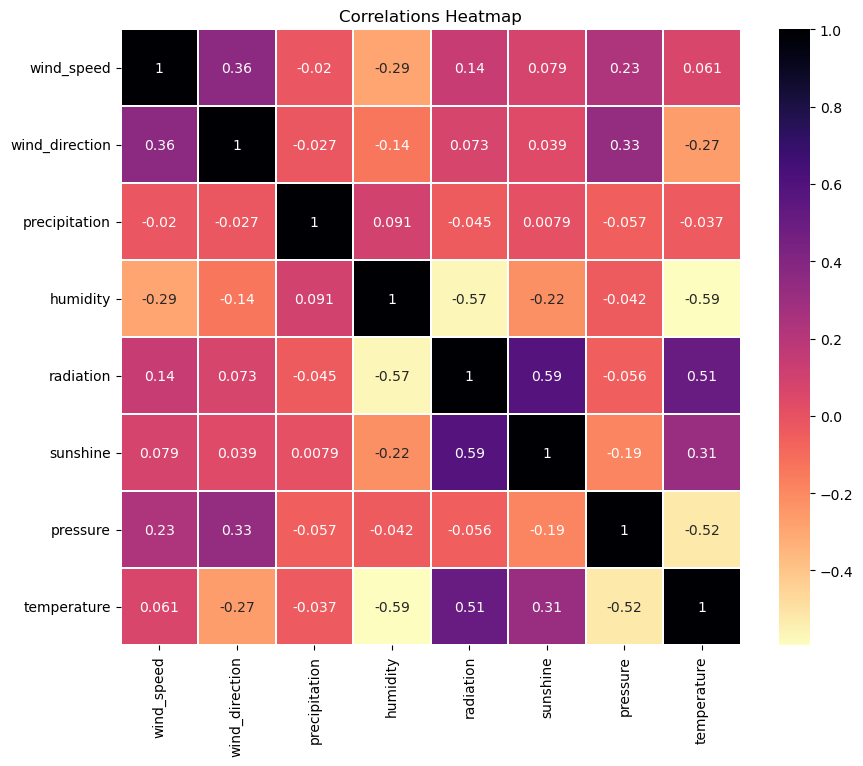

In [10]:
# Plotta subplots för temperatur, luftfuktighet, tryck, vindriktning och vindhastighet över tid
dataset_sep.plot(subplots=True, x='timestamp', y=['temperature', 'humidity', 'pressure', 'wind_direction', 'wind_speed'], figsize=(8, 8))

# Plotta temperatur, luftfuktighet och tryck mot vindriktning
dataset_sep.plot(subplots=True, x='wind_direction', y=['temperature', 'humidity', 'pressure'])

# Plotta temperatur, luftfuktighet och tryck mot vindhastighet
dataset_sep.plot(subplots=True, x='wind_speed', y=['temperature', 'humidity', 'pressure'])

# Visa graferna
plt.show()

# Scatter plot för solstrålning mot solsken
plt.plot(dataset_sep['sunshine'], dataset_sep['radiation'])
plt.xlabel('Sunshine')
plt.ylabel('Radiation')
plt.title('Radiation vs Sunshine')
plt.show()

# Scatter plot för nederbörd mot vindriktning
plt.plot(dataset_sep['wind_direction'], dataset_sep['precipitation'])
plt.xlabel('Wind Direction')
plt.ylabel('Precipitation')
plt.title('Precipitation vs Wind Direction')
plt.show()

# Scatter plot för lufttryck mot vindhastighet
plt.plot(dataset_sep['wind_speed'], dataset_sep['pressure'])
plt.xlabel('Wind Speed')
plt.ylabel('Pressure')
plt.title('Pressure vs Wind Speed')
plt.show()

# Korrelationer
correlation_matrix = dataset_sep.corr()

# Korrelogram (heatmap) med annoteringar
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='magma_r', linewidths=0.2)
plt.title("Correlations Heatmap")
plt.show()


### Conclusion:  
In September, the temperature was higher from the 13th to the 20th and then dropped. At the start of the month, the pressure was low because the wind was moving fast, causing sudden changes in wind direction. However, by the middle of the month, the pressure increased as the wind slowed down, making the wind direction more stable.  

There is a positive connection between wind direction, wind speed, and pressure. Similarly, temperature, sunshine, and radiation are closely linked. Humidity and precipitation also show a strong positive relationship.  

In [11]:
# Filtrera data för oktober månad
dataset_oct = dfs[dfs['timestamp'].between('2018-10-01', '2018-11-01')]

# Kontrollera storleken på oktober-datasetet
dataset_oct.shape

# Visa de sista raderna i oktober-datasetet
dataset_oct.tail()

# Beskrivande statistik för oktober-datasetet
dataset_oct.describe()


,wind_speed,wind_direction,precipitation,humidity,radiation,sunshine,pressure,temperature
count,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000
mean,5.457371,241.176139,0.013084,70.840546,116.255212,154.400216,1018.862329,14.150539
std,2.980341,68.793003,0.078758,19.364003,189.764785,257.414467,6.900629,4.649045
min,0.088733,26.449600,0.000000,9.100000,0.000000,0.000000,989.500000,1.700000
25%,3.251967,225.333333,0.000000,55.450000,0.000000,0.000000,1016.550000,10.900000
50%,4.934533,264.060000,0.000000,75.300000,0.000000,0.000000,1020.500000,13.400000
75%,7.423967,286.460000,0.000000,87.450000,182.000000,353.300000,1023.300000,17.400000
max,14.504667,339.046667,1.300000,99.000000,684.500000,600.000000,1028.200000,26.400000


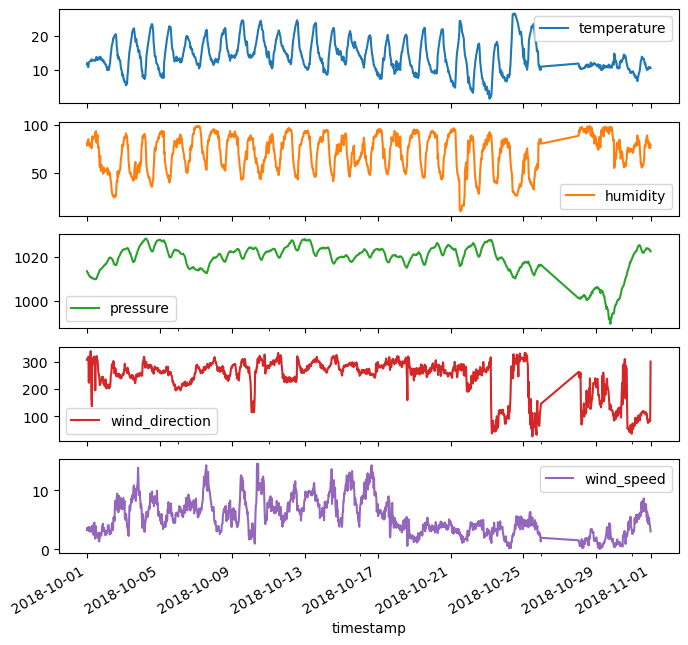

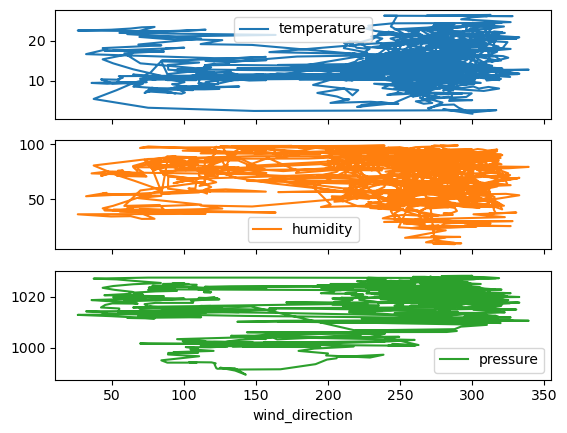

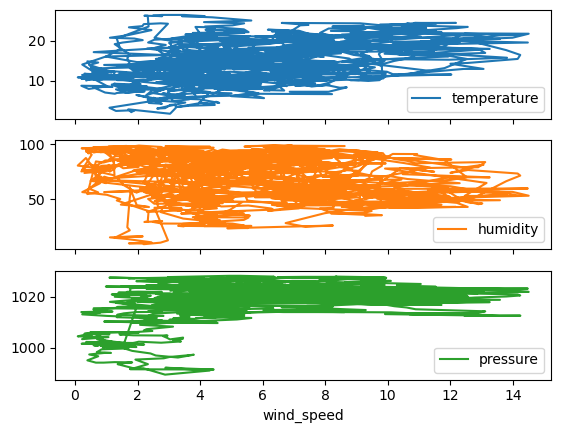

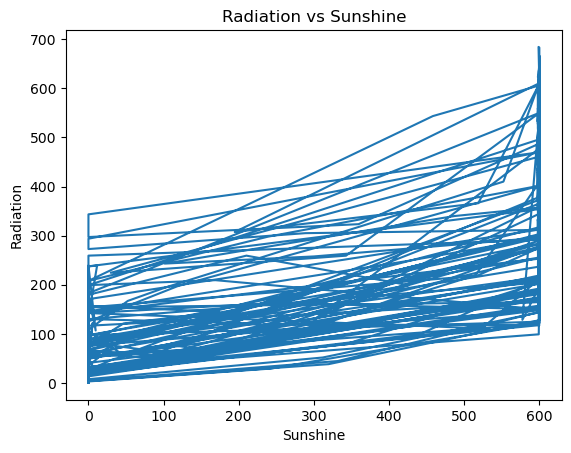

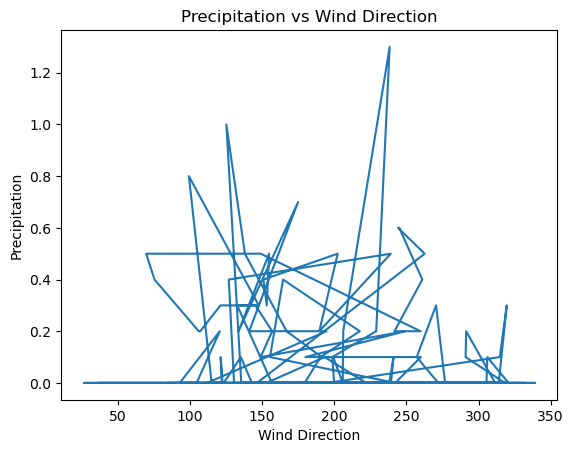

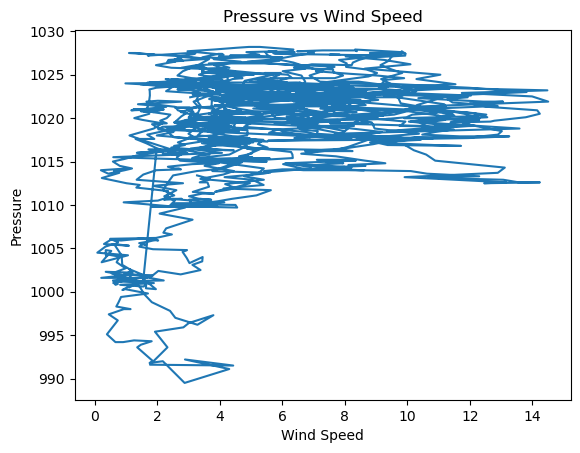

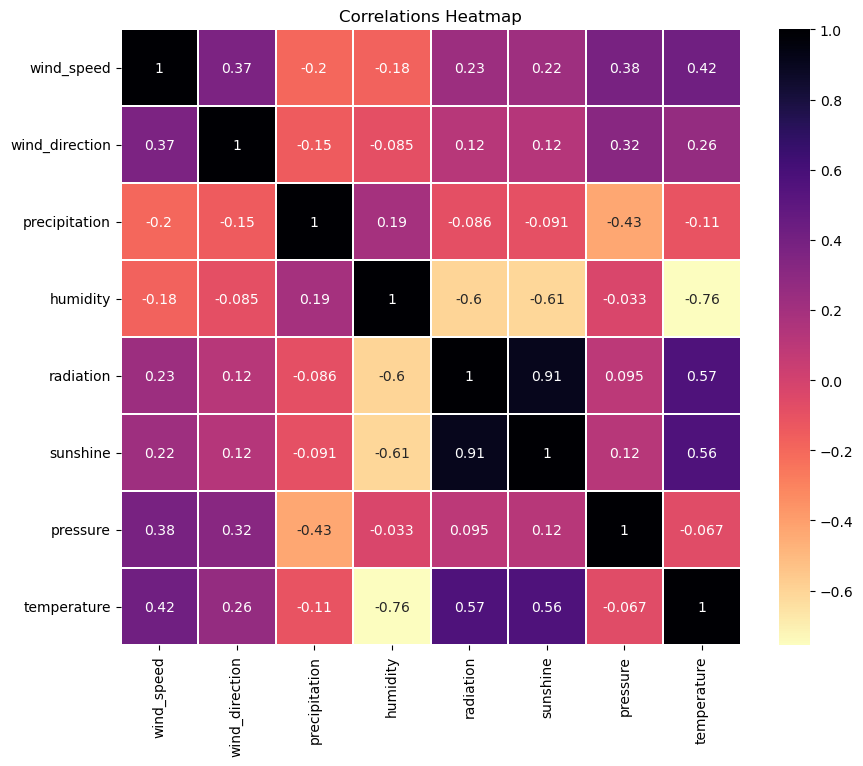

In [12]:

# Plotta subplots för temperatur, luftfuktighet, tryck, vindriktning och vindhastighet över tid
dataset_oct.plot(subplots=True, x='timestamp', y=['temperature', 'humidity', 'pressure', 'wind_direction', 'wind_speed'], figsize=(8, 8))

# Plotta temperatur, luftfuktighet och tryck mot vindriktning
dataset_oct.plot(subplots=True, x='wind_direction', y=['temperature', 'humidity', 'pressure'])

# Plotta temperatur, luftfuktighet och tryck mot vindhastighet
dataset_oct.plot(subplots=True, x='wind_speed', y=['temperature', 'humidity', 'pressure'])

# Visa graferna
plt.show()

# Scatter plot för solstrålning mot solsken
plt.plot(dataset_oct['sunshine'], dataset_oct['radiation'])
plt.xlabel('Sunshine')
plt.ylabel('Radiation')
plt.title('Radiation vs Sunshine')
plt.show()

# Scatter plot för nederbörd mot vindriktning
plt.plot(dataset_oct['wind_direction'], dataset_oct['precipitation'])
plt.xlabel('Wind Direction')
plt.ylabel('Precipitation')
plt.title('Precipitation vs Wind Direction')
plt.show()

# Scatter plot för lufttryck mot vindhastighet
plt.plot(dataset_oct['wind_speed'], dataset_oct['pressure'])
plt.xlabel('Wind Speed')
plt.ylabel('Pressure')
plt.title('Pressure vs Wind Speed')
plt.show()

# Korrelationer
correlation_matrix = dataset_oct.corr()

# Korrelogram (heatmap) med annoteringar
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='magma_r', linewidths=0.2)
plt.title("Correlations Heatmap")
plt.show()


### Conclusion:
In October, both the temperature and humidity were high throughout the month. The temperature dropped slightly but not by much. The pressure stayed high until the end of the month when the wind started moving faster and changed direction. Precipitation was also high, causing a lot of rain.

There is a positive connection between pressure and radiation this month. The same goes for temperature, radiation, and sunshine. Humidity and precipitation also show a positive relationship. Additionally, there is a positive connection between temperature, wind direction, and wind speed.

In [13]:
# Filtrera data för november månad
dataset_nov = dfs[dfs['timestamp'].between('2018-11-01', '2018-11-30')]

# Kontrollera storleken på november-datasetet
dataset_nov.shape

# Visa de sista raderna i november-datasetet
dataset_nov.tail()

# Beskrivande statistik för november-datasetet
dataset_nov.describe()


,wind_speed,wind_direction,precipitation,humidity,radiation,sunshine,pressure,temperature
count,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000
mean,3.784357,225.108852,0.004559,86.017945,53.559479,65.389436,1019.911288,8.365991
std,1.792995,87.827943,0.027722,16.631432,100.889871,182.474680,6.653334,4.213875
min,0.239800,22.754333,0.000000,25.800000,0.000000,0.000000,1000.500000,-1.800000
25%,2.449633,157.077883,0.000000,81.500000,0.000000,0.000000,1016.500000,5.125000
50%,3.588700,262.473333,0.000000,92.600000,0.000000,0.000000,1020.500000,8.800000
75%,4.910717,291.401667,0.000000,97.100000,61.600000,0.000000,1025.100000,11.800000
max,10.876000,343.893333,0.400000,100.100000,494.500000,600.000000,1032.300000,18.100000


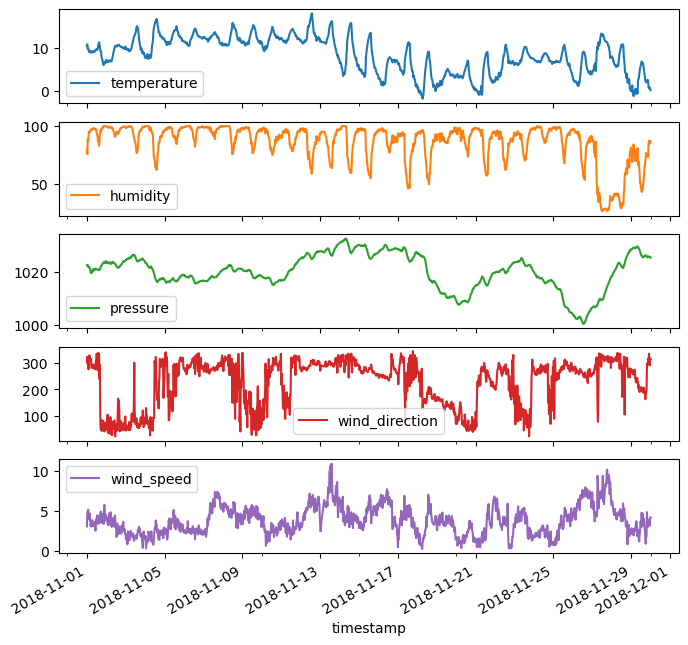

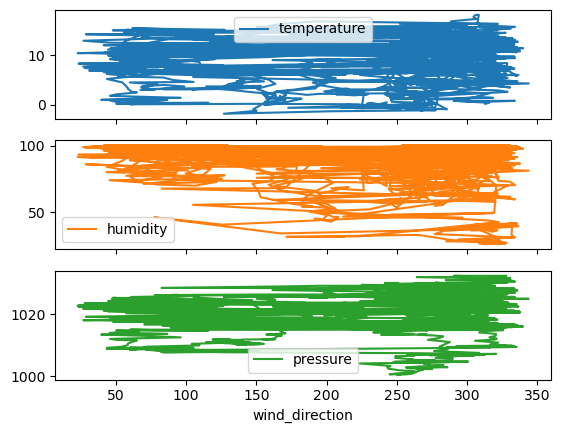

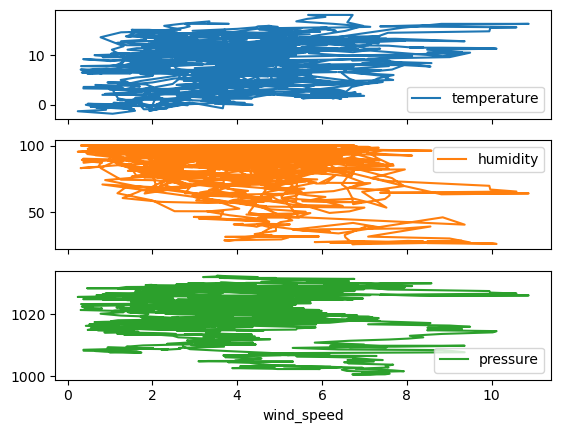

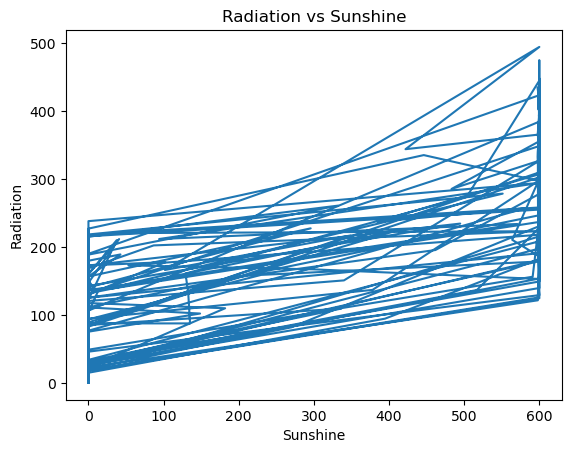

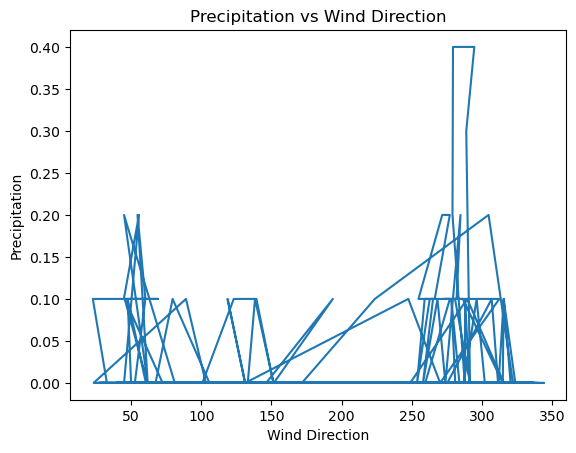

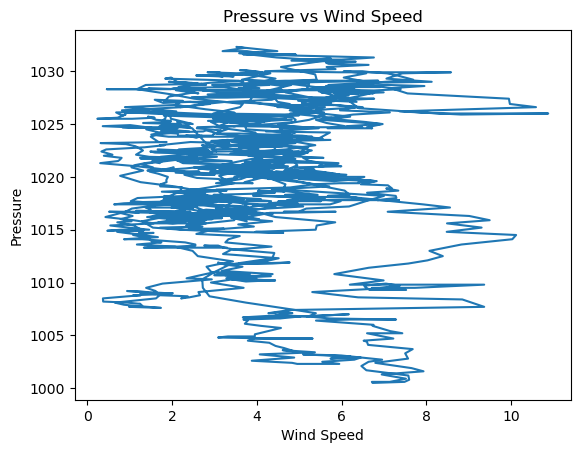

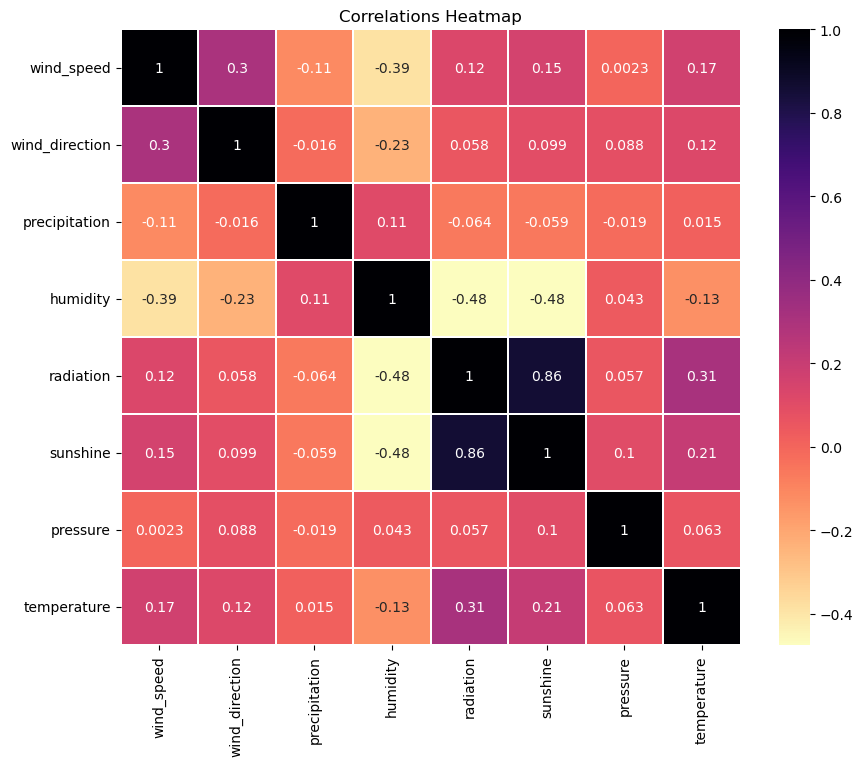

In [14]:
# Plotta subplots för temperatur, luftfuktighet, tryck, vindriktning och vindhastighet över tid
dataset_nov.plot(subplots=True, x='timestamp', y=['temperature', 'humidity', 'pressure', 'wind_direction', 'wind_speed'], figsize=(8, 8))

# Plotta temperatur, luftfuktighet och tryck mot vindriktning
dataset_nov.plot(subplots=True, x='wind_direction', y=['temperature', 'humidity', 'pressure'])

# Plotta temperatur, luftfuktighet och tryck mot vindhastighet
dataset_nov.plot(subplots=True, x='wind_speed', y=['temperature', 'humidity', 'pressure'])

# Visa graferna
plt.show()

# Scatter plot för solstrålning mot solsken
plt.plot(dataset_nov['sunshine'], dataset_nov['radiation'])
plt.xlabel('Sunshine')
plt.ylabel('Radiation')
plt.title('Radiation vs Sunshine')
plt.show()

# Scatter plot för nederbörd mot vindriktning
plt.plot(dataset_nov['wind_direction'], dataset_nov['precipitation'])
plt.xlabel('Wind Direction')
plt.ylabel('Precipitation')
plt.title('Precipitation vs Wind Direction')
plt.show()

# Scatter plot för lufttryck mot vindhastighet
plt.plot(dataset_nov['wind_speed'], dataset_nov['pressure'])
plt.xlabel('Wind Speed')
plt.ylabel('Pressure')
plt.title('Pressure vs Wind Speed')
plt.show()

# Korrelationer
correlation_matrix = dataset_nov.corr()

# Korrelogram (heatmap) med annoteringar
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='magma_r', linewidths=0.2)
plt.title("Correlations Heatmap")
plt.show()


### Conclusion:
In November, the temperature was high at the beginning of the month but dropped significantly from the 15th to the end. The pressure fluctuated throughout the month, sometimes being low and at other times high, depending on how fast or slow the wind was moving.

There is a strong positive correlation between sunshine and radiation. There is a negative relationship between temperature and humidity. However, the positive relationship between wind speed and wind direction has decreased compared to September and October.

In [15]:
#Jämför vädret för tre månader
# Kontrollera storleken på hela datasetet
dfs.shape

# Visa de sista raderna i datasetet
dfs.tail()

# Beskrivande statistik för hela datasetet (för tre månader)
dfs.describe()


,wind_speed,wind_direction,precipitation,humidity,radiation,sunshine,pressure,temperature
count,4254.000000,4254.000000,4254.000000,4254.000000,4254.000000,4254.000000,4254.000000,4254.000000
mean,4.330021,200.072013,0.007734,73.604419,120.822261,191.587306,1019.431993,14.078326
std,2.449578,89.465862,0.068773,20.300861,202.637541,275.756581,6.516052,6.681223
min,0.085533,20.225667,0.000000,9.100000,0.000000,0.000000,989.500000,-1.800000
25%,2.513950,111.325833,0.000000,57.200000,0.000000,0.000000,1016.300000,9.600000
50%,3.868233,228.916667,0.000000,78.700000,0.000000,0.000000,1019.800000,13.500000
75%,5.670367,279.473333,0.000000,91.100000,170.400000,598.900000,1023.300000,19.000000
max,14.504667,343.893333,2.700000,100.100000,928.000000,600.000000,1039.700000,30.400000


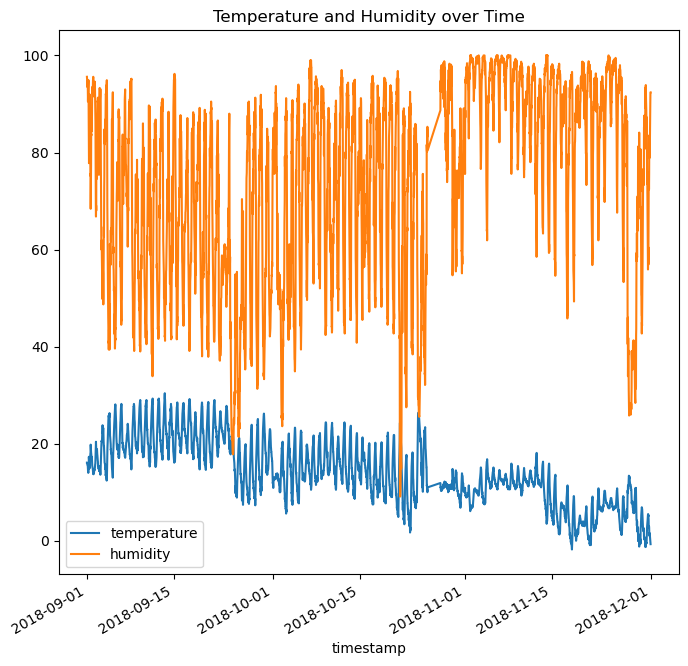

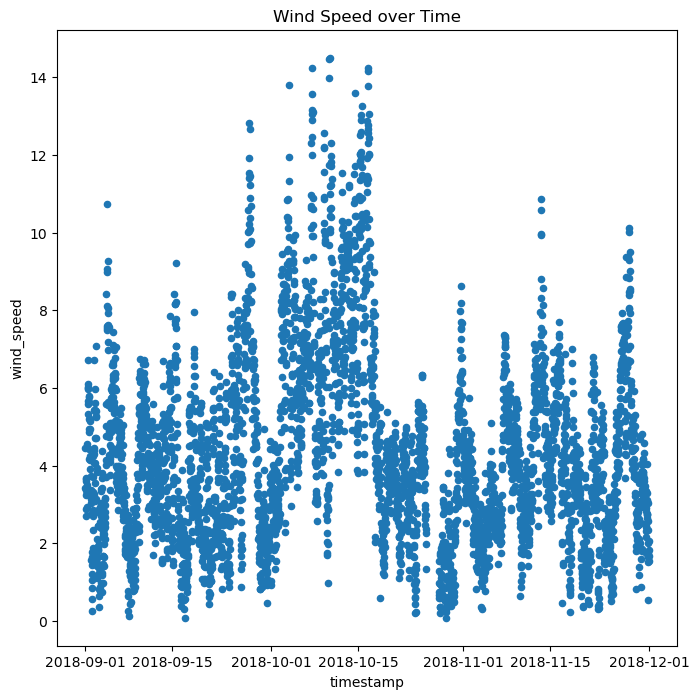

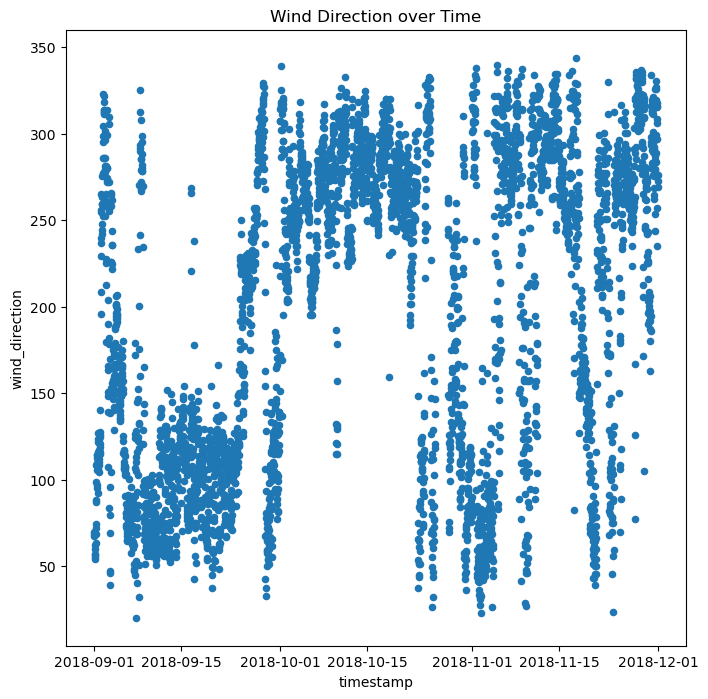

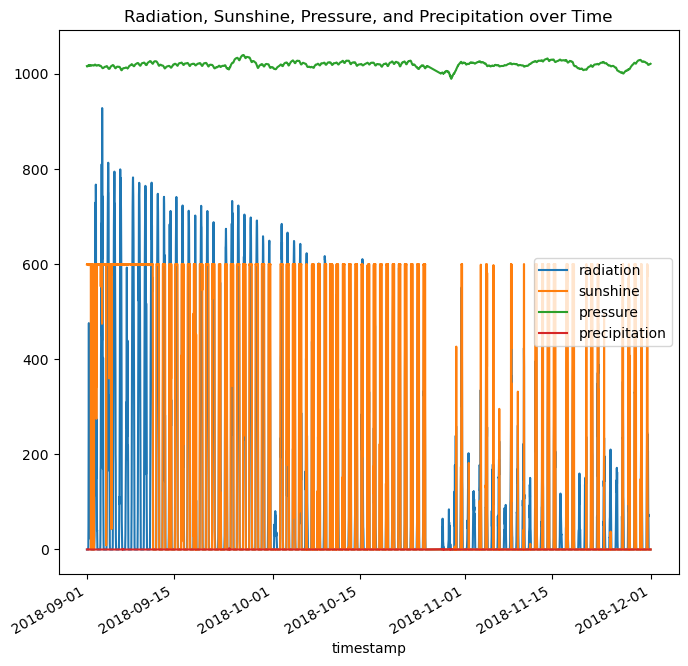

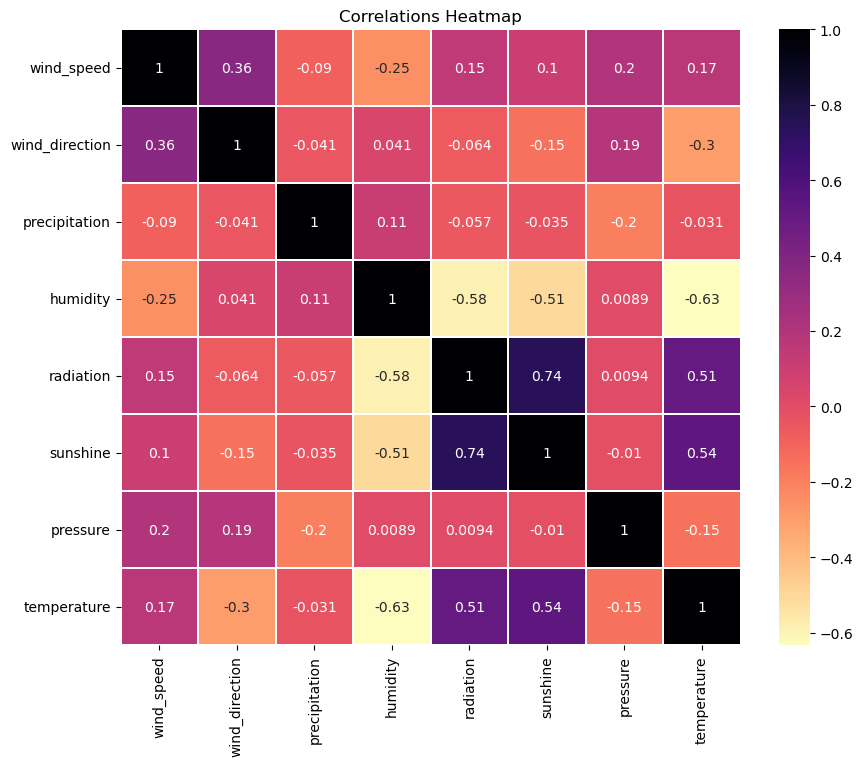

In [16]:
# Plotta temperatur och luftfuktighet över tid
dfs.plot(x='timestamp', y=['temperature', 'humidity'], figsize=(8, 8))
plt.title('Temperature and Humidity over Time')
plt.show()

# Scatter plot för vindhastighet över tid
dfs.plot.scatter(x='timestamp', y='wind_speed', figsize=(8, 8))
plt.title('Wind Speed over Time')
plt.show()

# Scatter plot för vindriktning över tid
dfs.plot.scatter(x='timestamp', y='wind_direction', figsize=(8, 8))
plt.title('Wind Direction over Time')
plt.show()

# Använd en stapelplot för att visualisera jämförelsen mellan strålning, solsken, tryck och nederbörd
dfs.plot(x='timestamp', y=['radiation', 'sunshine', 'pressure', 'precipitation'], figsize=(8, 8))
plt.title('Radiation, Sunshine, Pressure, and Precipitation over Time')
plt.show()

# Korrelationer
correlation_matrix = dfs.corr()

# Korrelogram (heatmap) med annoteringar
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='magma_r', linewidths=0.2)
plt.title("Correlations Heatmap")
plt.show()


### Conclusion:
In all three months, the temperature was highest in September and October and lowest in November, making the weather colder in November. There was less humidity in November.

The wind was the fastest in October, changing direction frequently, which caused lower pressure. In September and November, the pressure was higher, and the wind moved slower.

There was a lot of radiation in September due to the sun, while October saw a lot of precipitation, meaning heavy rain, likely due to the higher humidity. Rain was also observed in September and November, but not as much as in October.